classification of mood based music recomendation sysytrem

In [2]:
import pandas as pd

df = pd.read_csv('mood_music_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Heart Rate        1426 non-null   float64
 1   Skin Temperature  1425 non-null   float64
 2   Blink Rate        1425 non-null   float64
 3   Time of Day       1500 non-null   object 
 4   Mood              1500 non-null   object 
 5   Score             1500 non-null   float64
dtypes: float64(4), object(2)
memory usage: 70.4+ KB


### Check for basic information of the dataset

In [4]:
df.describe()

,Heart Rate,Skin Temperature,Blink Rate,Score
count,1426.000000,1425.000000,1425.000000,1500.000000
mean,77.843757,36.698148,19.586073,49.576690
std,13.498636,0.653120,7.914658,28.982625
min,48.057860,35.242954,6.196953,0.120361
25%,67.832895,36.245589,13.295831,23.810211
50%,75.104663,36.620182,18.252399,48.809452
75%,84.836639,37.095891,23.279777,74.785482
max,125.619470,38.882990,49.493592,99.884483


In [5]:
df.describe(include='all')

,Heart Rate,Skin Temperature,Blink Rate,Time of Day,Mood,Score
count,1426.000000,1425.000000,1425.000000,1500,1500,1500.000000
unique,NaN,NaN,NaN,4,4,NaN
top,NaN,NaN,NaN,Afternoon,Happy,NaN
freq,NaN,NaN,NaN,389,375,NaN
mean,77.843757,36.698148,19.586073,NaN,NaN,49.576690
std,13.498636,0.653120,7.914658,NaN,NaN,28.982625
min,48.057860,35.242954,6.196953,NaN,NaN,0.120361
25%,67.832895,36.245589,13.295831,NaN,NaN,23.810211
50%,75.104663,36.620182,18.252399,NaN,NaN,48.809452
75%,84.836639,37.095891,23.279777,NaN,NaN,74.785482


In [6]:
print("Time of Day unique values:", df['Time of Day'].unique())
print("Mood unique values:", df['Mood'].unique())

Time of Day unique values: ['Night' 'Morning' 'Afternoon' 'Evening']
Mood unique values: ['Happy' 'Sad' 'Stressed' 'Relaxed']


The "Mood" and "Time of Day" are in object class, changing to categories since each of the mentioned colums has only 4 unique values

In [7]:
df['Mood'] = df['Mood'].astype('category')
df['Time of Day'] = df['Time of Day'].astype('category')

In [ ]:
# Calculate average heartrate for each mood
avg_heartrate_per_mood = df.groupby('Mood')['Heart Rate'].mean()
print(avg_heartrate_per_mood)

fills NaN values in the "Heart Rate" column with the average heart rate for each mood.

In [ ]:
# Impute missing Heart Rate values with average per Mood
df['Heart Rate'] = df.groupby('Mood')['Heart Rate'].transform(lambda x: x.fillna(x.mean()))

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Heart Rate        1500 non-null   float64 
 1   Skin Temperature  1500 non-null   float64 
 2   Blink Rate        1500 non-null   float64 
 3   Time of Day       1500 non-null   category
 4   Mood              1500 non-null   category
 5   Score             1500 non-null   float64 
dtypes: category(2), float64(4)
memory usage: 50.3 KB


In [54]:
# Count number of samples for each mood
print(df['Mood'].value_counts())

Mood
Happy       375
Relaxed     375
Sad         375
Stressed    375
Name: count, dtype: int64


Trying to establish the realtion ship between Heart rate and Skin temperature

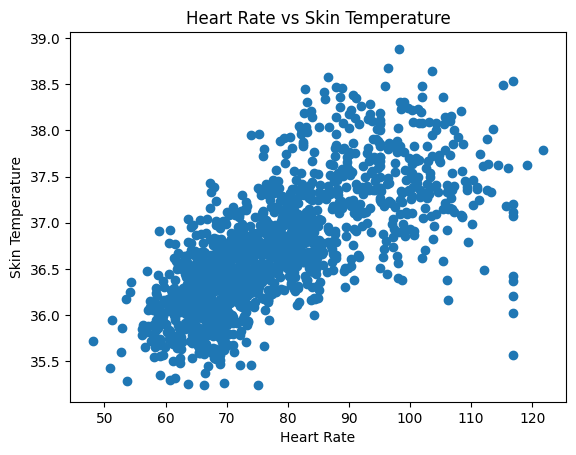

In [11]:
import matplotlib.pyplot as plt

plt.scatter(df['Heart Rate'], df['Skin Temperature'])
plt.xlabel('Heart Rate')
plt.ylabel('Skin Temperature')
plt.title('Heart Rate vs Skin Temperature')
plt.show()

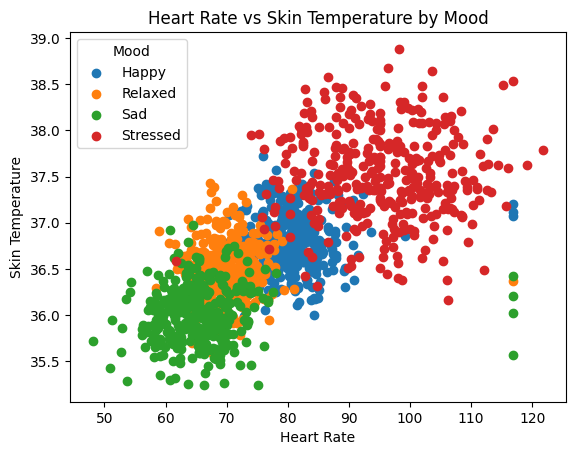

In [12]:
import matplotlib.pyplot as plt

# Plot each mood with a different color and add legend
for mood in df['Mood'].cat.categories:
    subset = df[df['Mood'] == mood]
    plt.scatter(subset['Heart Rate'], subset['Skin Temperature'], label=mood)

plt.xlabel('Heart Rate')
plt.ylabel('Skin Temperature')
plt.title('Heart Rate vs Skin Temperature by Mood')
plt.legend(title='Mood')
plt.show()

In [13]:
# Impute missing Skin Temperature values with average per Mood
df['Skin Temperature'] = df.groupby('Mood')['Skin Temperature'].transform(lambda x: x.fillna(x.mean()))

C:\Users\Boobalan\AppData\Local\Temp\ipykernel_2928\2512351817.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Skin Temperature'] = df.groupby('Mood')['Skin Temperature'].transform(lambda x: x.fillna(x.mean()))


Lets look into the blink rate with mood

In [14]:
# Find min, max, and average of Blink Rate
min_blink = df['Blink Rate'].min()
max_blink = df['Blink Rate'].max()
avg_blink = df['Blink Rate'].mean()

print("Minimum Blink Rate:", min_blink)
print("Maximum Blink Rate:", max_blink)
print("Average Blink Rate:", avg_blink)

Minimum Blink Rate: 6.196952634612842
Maximum Blink Rate: 49.493591948570895
Average Blink Rate: 19.586073171912933


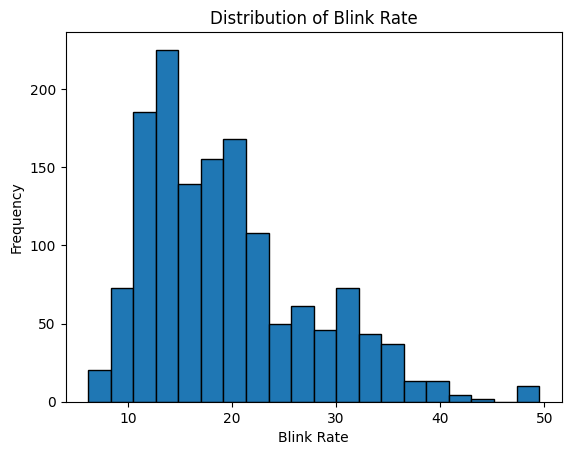

In [15]:
import matplotlib.pyplot as plt

plt.hist(df['Blink Rate'], bins=20, edgecolor='black')
plt.xlabel('Blink Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Blink Rate')
plt.show()

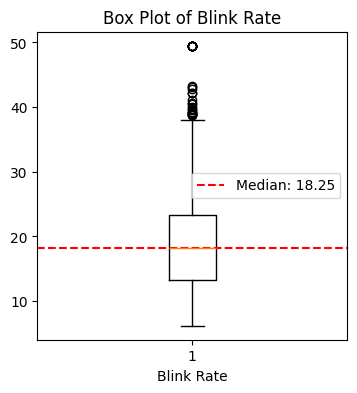

Median Blink Rate: 18.252399262433403
25th percentile: 13.295831137015606
75th percentile: 23.27977685764078
Min: 6.196952634612842
Max: 49.493591948570895


In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))  # Set small figure size
plt.boxplot(df['Blink Rate'].dropna())
plt.xlabel('Blink Rate')
plt.title('Box Plot of Blink Rate')

# Add median line
median = df['Blink Rate'].median()
plt.axhline(median, color='red', linestyle='--', label=f'Median: {median:.2f}')

plt.legend()
plt.show()

# Show distribution stats
print("Median Blink Rate:", median)
print("25th percentile:", df['Blink Rate'].quantile(0.25))
print("75th percentile:", df['Blink Rate'].quantile(0.75))
print("Min:", df['Blink Rate'].min())
print("Max:", df['Blink Rate'].max())

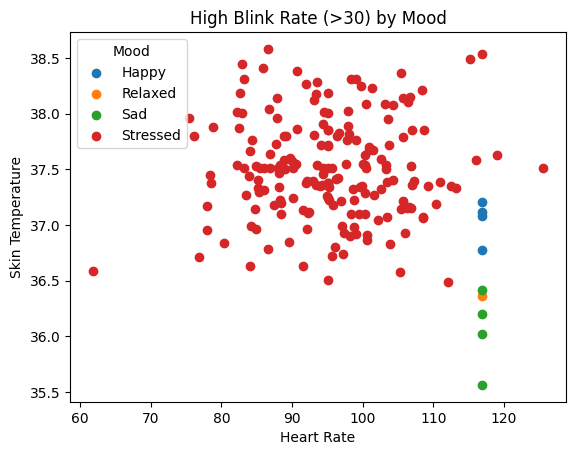

In [17]:
import matplotlib.pyplot as plt

# Filter data for Blink Rate > 30
high_blink = df[df['Blink Rate'] > 30]

# Plot Heart Rate vs Skin Temperature for high Blink Rate, colored by Mood
for mood in high_blink['Mood'].cat.categories:
    subset = high_blink[high_blink['Mood'] == mood]
    plt.scatter(subset['Heart Rate'], subset['Skin Temperature'], label=mood)

plt.xlabel('Heart Rate')
plt.ylabel('Skin Temperature')
plt.title('High Blink Rate (>30) by Mood')
plt.legend(title='Mood')
plt.show()

<Figure size 600x400 with 0 Axes>

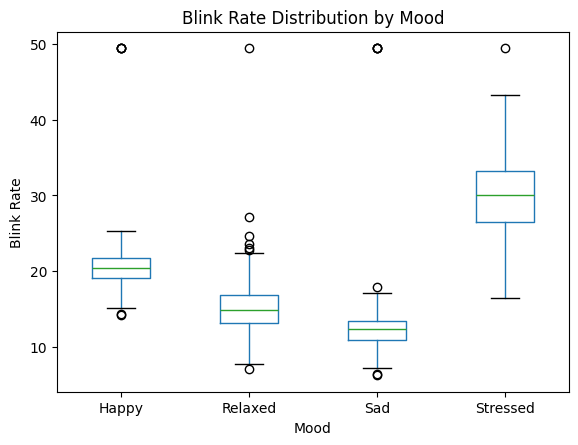

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
ax = df.boxplot(column='Blink Rate', by='Mood', grid=False)  # Remove cross/grid lines
plt.xlabel('Mood')
plt.ylabel('Blink Rate')
plt.title('Blink Rate Distribution by Mood')
plt.suptitle('')  # Remove default subtitle
plt.gca().set_facecolor('white')  # Set background to white
plt.show()

since all values in blink rate with according mood reflects a normally distributed plot, lets impute average values of according mood's avg value


In [ ]:
# Impute missing Blink Rate values with average per Mood
df['Blink Rate'] = df.groupby('Mood')['Blink Rate'].transform(lambda x: x.fillna(x.mean()))

Mood vs Time of Day

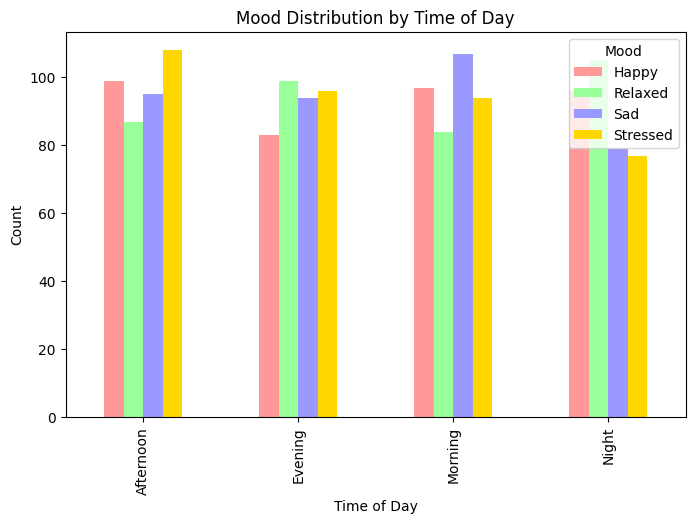

In [26]:
import matplotlib.pyplot as plt
colors = ['#FF9999', '#99FF99', '#9999FF', '#FFD700']  # Example color list for 4 moods
cross_tab = pd.crosstab(df['Time of Day'], df['Mood'])
cross_tab.plot(kind='bar', figsize=(8, 5), color=colors)
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.title('Mood Distribution by Time of Day')
plt.legend(title='Mood')
plt.show()

Justify why score variable is not a useful information to the model

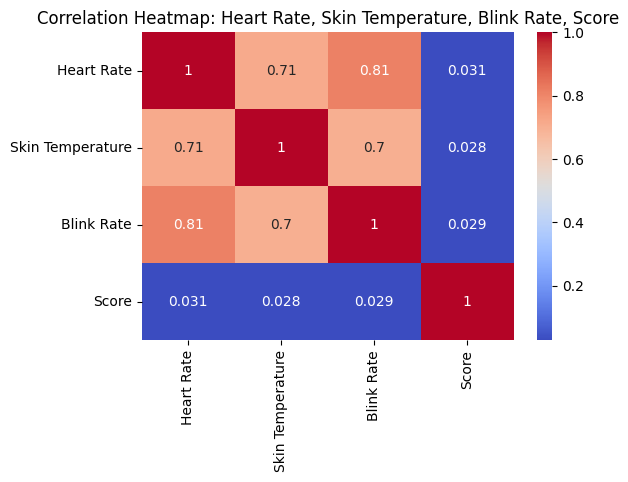

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for selected columns
corr_matrix = df[['Heart Rate', 'Skin Temperature', 'Blink Rate', 'Score']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Heart Rate, Skin Temperature, Blink Rate, Score')
plt.show()

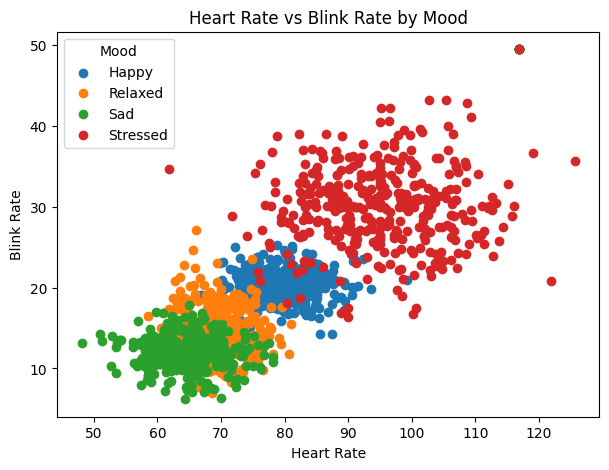

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5))
for mood in df['Mood'].cat.categories:
    subset = df[df['Mood'] == mood]
    plt.scatter(subset['Heart Rate'], subset['Blink Rate'], label=mood)
plt.xlabel('Heart Rate')
plt.ylabel('Blink Rate')
plt.title('Heart Rate vs Blink Rate by Mood')
plt.legend(title='Mood')
plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Heart Rate        1500 non-null   float64 
 1   Skin Temperature  1500 non-null   float64 
 2   Blink Rate        1500 non-null   float64 
 3   Time of Day       1500 non-null   category
 4   Mood              1500 non-null   category
 5   Score             1500 non-null   float64 
dtypes: category(2), float64(4)
memory usage: 50.3 KB


# Model building

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [47]:
# Encode categorical variable
#df['Time of Day'] = df['Time of Day'].cat.codes
df['Mood'] = df['Mood'].astype('category')

In [48]:
# Features and target
X = df[['Heart Rate', 'Skin Temperature', 'Blink Rate', 'Time of Day']]
y = df['Mood']

In [49]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Model training
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [51]:
# Predictions
y_pred = clf.predict(X_test)

In [52]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8933333333333333
              precision    recall  f1-score   support

       Happy       0.89      0.88      0.89        75
     Relaxed       0.78      0.92      0.84        71
         Sad       0.95      0.82      0.88        66
    Stressed       0.97      0.94      0.95        88

    accuracy                           0.89       300
   macro avg       0.90      0.89      0.89       300
weighted avg       0.90      0.89      0.89       300



In [53]:
# Train and test accuracy for Random Forest
train_accuracy_rf = accuracy_score(y_train, clf.predict(X_train))
test_accuracy_rf = accuracy_score(y_test, y_pred)
print("Random Forest Train Accuracy:", train_accuracy_rf)
print("Random Forest Test Accuracy:", test_accuracy_rf)

Random Forest Train Accuracy: 0.9308333333333333
Random Forest Test Accuracy: 0.8933333333333333


# Logistic regressor model

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
# Model training with Logistic Regression
logreg = LogisticRegression(max_iter=200, random_state=42)
logreg.fit(X_train, y_train)

d:\mini_project_sport_analytics\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, random_state=42)

In [35]:
# Predictions
y_pred_logreg = logreg.predict(X_test)

In [36]:
# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.8466666666666667
              precision    recall  f1-score   support

       Happy       0.86      0.93      0.90        75
     Relaxed       0.77      0.69      0.73        71
         Sad       0.75      0.82      0.78        66
    Stressed       0.98      0.92      0.95        88

    accuracy                           0.85       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.85      0.85      0.85       300



In [38]:
from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_test, y_pred_logreg)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8466666666666667


In [39]:
# Train and test accuracy for Logistic Regression
train_accuracy = accuracy_score(y_train, logreg.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred_logreg)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.8291666666666667
Test Accuracy: 0.8466666666666667


# XG-boost

In [41]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

In [43]:
# Encode Mood as numeric codes for XGBoost
y_encoded = df['Mood'].cat.codes

# Use y_encoded instead of y for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

d:\mini_project_sport_analytics\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:42:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [44]:
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

d:\mini_project_sport_analytics\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:42:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [45]:
train_accuracy_xgb = accuracy_score(y_train, xgb_clf.predict(X_train))
test_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Train Accuracy:", train_accuracy_xgb)
print("XGBoost Test Accuracy:", test_accuracy_xgb)

XGBoost Train Accuracy: 1.0
XGBoost Test Accuracy: 0.8866666666666667


# Model conclusion

| Model                   | Train Accuracy | Test Accuracy | Inference                                             |
| ----------------------- | -------------: | ------------: | --------------------------------------------------- |
| Random Forest (Default) |       **1.00** |      **0.90** | Signs of overfitting (perfect train, lower test).   |
| Random Forest (Tuned)   |           0.93 |          0.89 | Better generalization, small drop vs. default.      |
| Logistic Regression     |           0.82 |          0.84 | Lowest train score but generalizes reasonably well. |
| XGBoost                 |       **1.00** |          0.88 | Strong overfitting (perfect train, weaker test).    |


## Model pickling

In [55]:
import joblib

# Save the trained Random Forest model to a file
joblib.dump(clf, 'random_forest_model.pkl')

['random_forest_model.pkl']